In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('50_Startups.csv')


In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
#We have to find the information and description of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [18]:
# Now convert the State column into a numeric column

df['State'].replace(['Florida','New York','California'],[0,1,2],inplace=True)

In [19]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.020000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.820403,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [24]:
# Now we will split the data in dependent and independent variales as an array

X = df.iloc[:,:-1].values
print(X.shape)

(50, 4)


In [23]:
y = df.iloc[:,1].values
print(y.shape)

(50,)


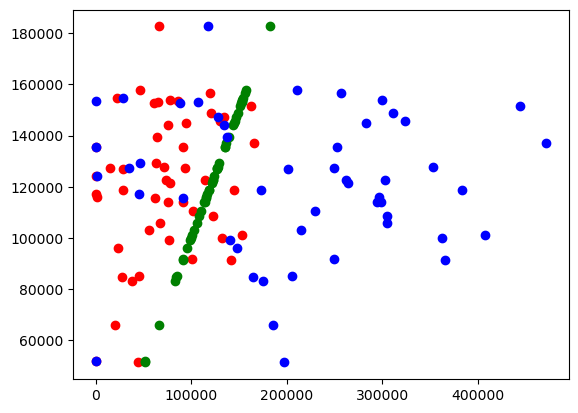

In [34]:
# Need to check the behaviour of data whether linear Regression can be use for it or not



plt.scatter(X[:,0],y,color='red')
plt.scatter(X[:,1],y,color='green')
plt.scatter(X[:,2],y,color='blue')
plt.show()

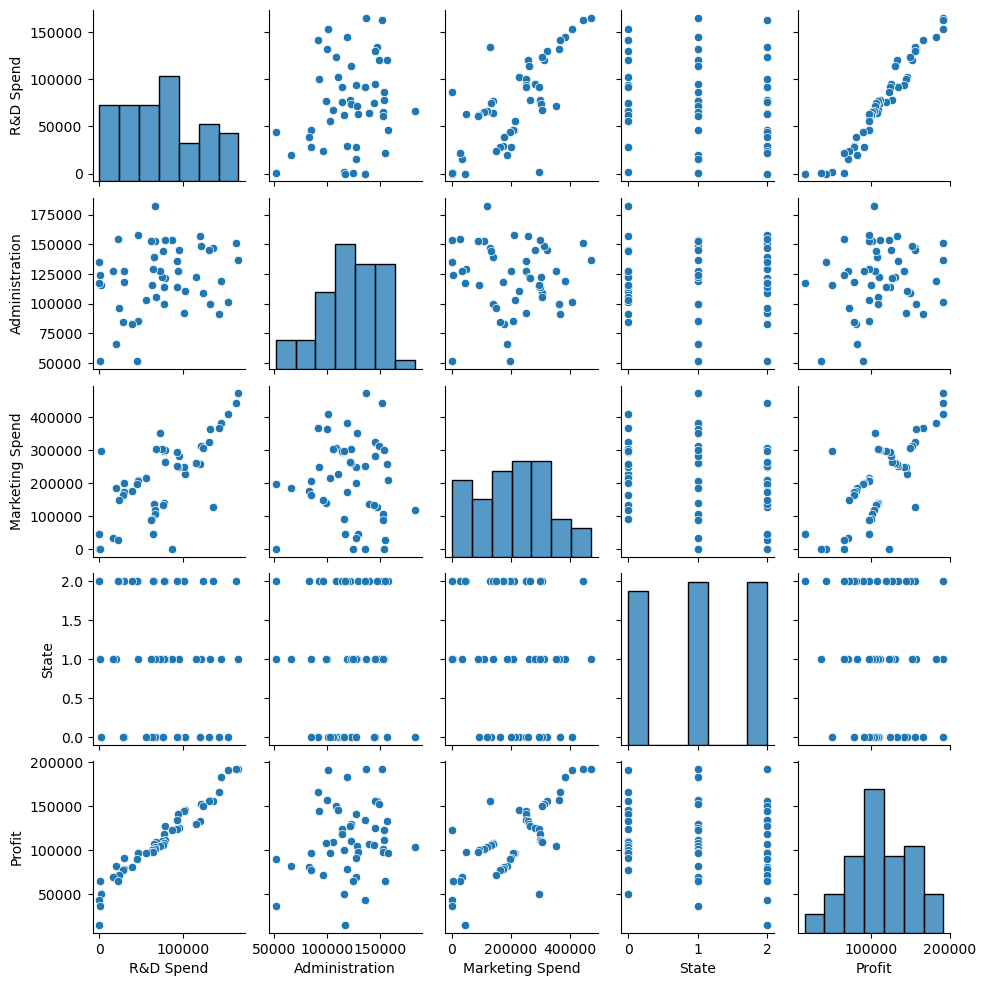

In [53]:
import seaborn as sns

sns.pairplot(data = df, height = 2)  
plt.show()

As we can see there is no relationship between the state column 

Correlation coefficient matrix for each independent variable: 
                  R&D Spend  Administration  Marketing Spend
R&D Spend         1.000000        0.241955         0.724248
Administration    0.241955        1.000000        -0.032154
Marketing Spend   0.724248       -0.032154         1.000000


[]

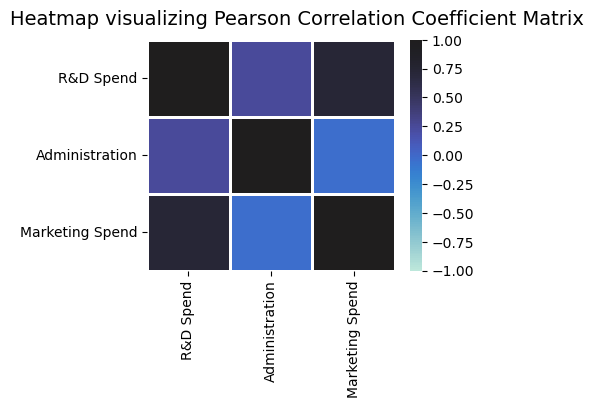

In [57]:
corr = df[["R&D Spend","Administration","Marketing Spend"]].corr()  
print('Correlation coefficient matrix for each independent variable: \n', corr)

figure, axis = plt.subplots(figsize = (4, 3))  
  

sns.heatmap(corr,  vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap visualizing Pearson Correlation Coefficient Matrix', fontsize = 14)  
plt.plot()

In [35]:
# As we can see data is distributted in a linear line manner so we wil you Linear regression algorithm 
# First need to split the data into test and train

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [58]:
# check the dimestion
print(X_test.ndim)
print(X_train.ndim)
print(y_test.ndim)
print(y_train.ndim)

2
2
1
1


In [59]:
# now import the Linear regration class and fit the data

from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_test,y_test)

LinearRegression()

In [60]:
# Now Get the coefficint and the intersection of the Line of the model

lrm.coef_

array([4.36136234e-16, 1.00000000e+00, 1.20184593e-16, 3.80397325e-12])

In [61]:
# Intercept

lrm.intercept_

-1.0186340659856796e-10

## Model Prediction

In [41]:
y_predict = lrm.predict(X_test)

In [62]:
# check the predicted output

print(y_predict)

[182645.56  91790.61 110594.11  84710.77 101145.55 127864.55  65947.93
 152701.92 122782.75  91391.77]


In [63]:
# Comparing the result
df1 = pd.DataFrame(y_test,columns=['Orignal data'])
df2 = pd.DataFrame(y_predict,columns = ['Predicted Result'])

pd.concat([df1,df2])

,Orignal data,Predicted Result
0,182645.56,NaN
1,91790.61,NaN
2,110594.11,NaN
3,84710.77,NaN
4,101145.55,NaN
5,127864.55,NaN
6,65947.93,NaN
7,152701.92,NaN
8,122782.75,NaN
9,91391.77,NaN


In [64]:
pd.concat([df1,df2],axis=1)

,Orignal data,Predicted Result
0,182645.56,182645.56
1,91790.61,91790.61
2,110594.11,110594.11
3,84710.77,84710.77
4,101145.55,101145.55
5,127864.55,127864.55
6,65947.93,65947.93
7,152701.92,152701.92
8,122782.75,122782.75
9,91391.77,91391.77


In [74]:
independent.shape
print(dependent.shape)

(50,)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (42875,) and arg 2 with shape (10,).

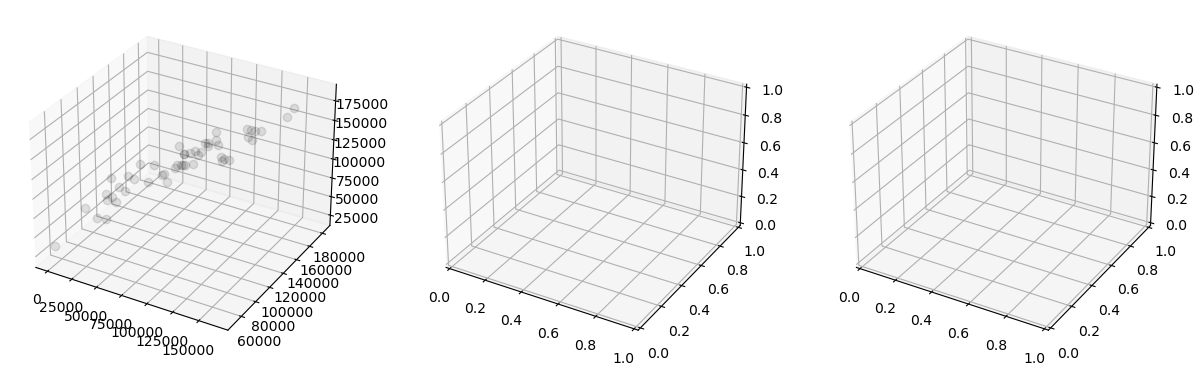

In [68]:
 #Plotting a 3-D plot for visualizing the Multiple Linear Regression Model  
  
 # Preparing the data  
independent = df[["R&D Spend","Administration"]].values.reshape(-1,2)  
dependent = df['Profit']  
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T  


r2 =metrics.r2_score(y_test,y_predict)  # R2 score

# Initializing a matplotlib figure  
fig = plt.figure(figsize = (15, 6))  
  
axis1 = fig.add_subplot(131, projection = '3d')  
axis2 = fig.add_subplot(132, projection = '3d')  
axis3 = fig.add_subplot(133, projection = '3d')  
  
axes = [axis1, axis2, axis3]  
  
for ax in axes:  
    ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
    ax.scatter(x_range.flatten(), y_range.flatten(), y_predict, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')  
    ax.set_xlabel('Area', fontsize = 10, labelpad = 10)  
    ax.set_ylabel('Bedrooms', fontsize = 10, labelpad = 10)  
    ax.set_zlabel('Prices', fontsize = 10, labelpad = 10)  
    ax.locator_params(nbins = 3, axis = 'x')  
    ax.locator_params(nbins = 3, axis = 'x')  


axis1.view_init(elev=25, azim=-60)  
axis2.view_init(elev=15, azim=15)  
axis3.view_init(elev=25, azim=60)  
  
fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k')  

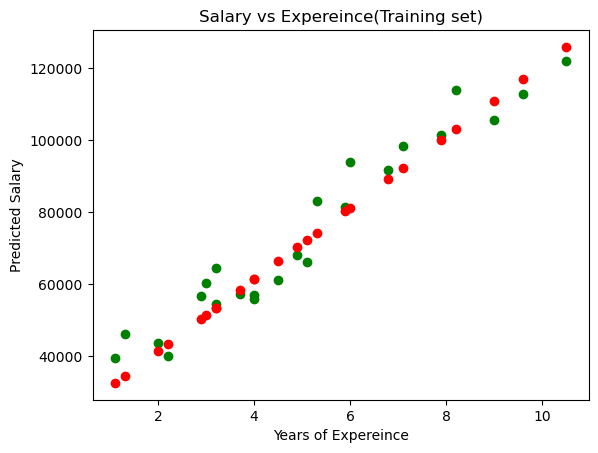

In [45]:
# Now compare the Y predicted data with the and actual Data X train data

plt.scatter(X_train,y_train,color='green')
plt.scatter(X_train,lrm.predict(X_train),color='red')
plt.title('Salary vs Expereince(Training set)')
plt.xlabel('Years of Expereince')
plt.ylabel('Predicted Salary')
plt.show()

In [69]:
# check the Accuracy of the data
## Model Evaluation

from sklearn import metrics

metrics.r2_score(y_test,y_predict)  # R2 score


1.0

In [70]:
# MSE score
metrics.mean_squared_error(y_test,y_predict) #(MSE=Mean squre error)

1.0587911840678754e-21

In [71]:
# RMSE
metrics.median_absolute_error(y_test,y_predict) #(MAE=Mean absolute error)

2.9103830456733704e-11

In [72]:
#score(features,target) returns the R² score of our model which is the percentage of explained variance of the predictions by the model
lrm.score(X_test,y_test) #lrm.score first it will predict and then cheks score)

1.0